In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

## Exercise 1


$\overline{K} = \alpha \beta^{\frac{1}{1-\alpha}}$  
$F=\frac{\alpha \overline{K}^{\alpha-1}}{\overline{K}^{\alpha}-\overline{K}}$  
$G=-\frac{\alpha \overline{K}^{\alpha-1}\left(\alpha+\overline{K}^{\alpha-1}\right)}{\overline{K}^{\alpha}-\overline{K}}$  
$H=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}}$  
$L=-\frac{\alpha \overline{K}^{2 \alpha-1}}{\overline{K}^{\alpha}-\overline{K}}$  
$M=\frac{\alpha^{2} \overline{K}^{2(\alpha-1)}}{\overline{K}^{\alpha}-\overline{K}}$  
$N=I_{n_z}$, exogenous, determines the law of motion.

In [2]:
def policy(α, β, ρ, K0, z0):
    Kbar = (α * β)**(1/(1-α))
    F = α*Kbar**(α-1)/(Kbar**α - Kbar)
    G = -α*Kbar**(α-1)*(α+Kbar**(α-1))/(Kbar**α - Kbar)
    H = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    L = -α*Kbar**(2*α-1)/(Kbar**α - Kbar)
    M = α**2*Kbar**(2*(α-1))/(Kbar**α - Kbar)
    N = ρ
    
    P1 = (-G + np.sqrt(G**2 - 4*F*H))/(2*F)
    P2 = (-G - np.sqrt(G**2 - 4*F*H))/(2*F)
    Q1 = -(L*N + M)/(F*N+F*P1+G)
    Q2 = -(L*N + M)/(F*N+F*P2+G)
    
    K1 = Kbar + P1*(K0 - Kbar) + Q1*z0
    K2 = Kbar + P2*(K0 - Kbar) + Q2*z0
    
    return K1, K2

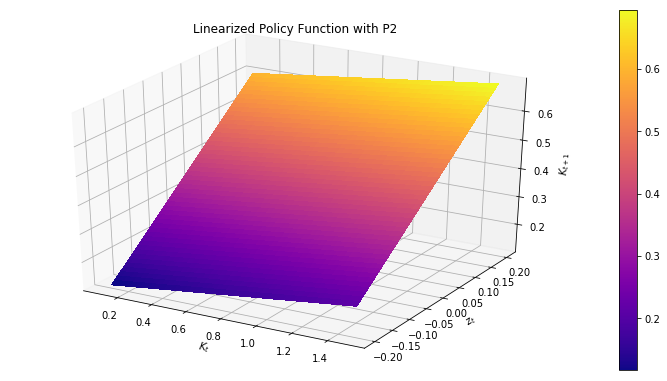

In [3]:
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02

numpoints = 50
Kmax = 1.5
Kmin = 0.1
zmax = 10 * σ
zmin = -10 * σ
K_grid = np.linspace(Kmin, Kmax, 50)
z_grid = np.linspace(zmin, zmax, 50)

KK, ZZ = np.meshgrid(K_grid, z_grid)

policy_value1 = np.zeros((numpoints, numpoints))
policy_value2 = np.zeros((numpoints, numpoints))
for i in range(numpoints):
    policy_value1[i,:] = policy(α, β, ρ, K_grid[i], z_grid)[0]
    policy_value2[i,:] = policy(α, β, ρ, K_grid[i], z_grid)[1]

# we should pick the one with P<1, which is P2
# fig = plt.figure(figsize = (10,5))
# ax = Axes3D(fig)
# surf = ax.plot_surface(KK, ZZ, policy_value1, cmap='plasma', linewidth=0, antialiased=False)
# ax.set_title('Linearized Policy Function with P1')
# ax.set_xlabel(r'$K_t$')
# ax.set_ylabel(r'$z_t$')
# ax.set_zlabel(r'$K_{t+1}$')
# fig.colorbar(surf)
# plt.show()

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
surf = ax.plot_surface(KK, ZZ, policy_value2, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Linearized Policy Function with P2')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
fig.colorbar(surf)
plt.show()

## Exerise 2

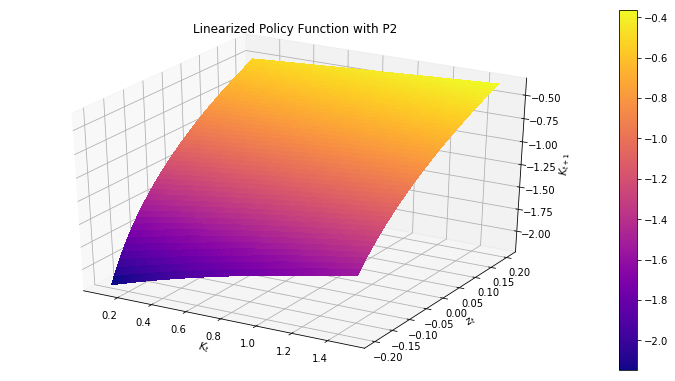

In [4]:
α = 0.35
β = 0.98
ρ = 0.95
σ = 0.02

numpoints = 50
Kmax = 1.5
Kmin = 0.1
zmax = 10 * σ
zmin = -10 * σ
K_grid = np.linspace(Kmin, Kmax, 50)
z_grid = np.linspace(zmin, zmax, 50)

KK, ZZ = np.meshgrid(K_grid, z_grid)

policy_value1 = np.zeros((numpoints, numpoints))
policy_value2 = np.zeros((numpoints, numpoints))
for i in range(numpoints):
    policy_value1[i,:] = np.sign(policy(α, β, ρ, K_grid[i], z_grid)[0]) * np.log(abs((policy(α, β, ρ, K_grid[i], z_grid)[0])))
    policy_value2[i,:] = np.sign(policy(α, β, ρ, K_grid[i], z_grid)[1]) * np.log(abs((policy(α, β, ρ, K_grid[i], z_grid)[1])))

# we should pick the one with P<1, which is P2
# fig = plt.figure(figsize = (10,5))
# ax = Axes3D(fig)
# surf = ax.plot_surface(KK, ZZ, policy_value1, cmap='plasma', linewidth=0, antialiased=False)
# ax.set_title('Linearized Policy Function with P1')
# ax.set_xlabel(r'$K_t$')
# ax.set_ylabel(r'$z_t$')
# ax.set_zlabel(r'$K_{t+1}$')
# fig.colorbar(surf)
# plt.show()

fig = plt.figure(figsize = (10,5))
ax = Axes3D(fig)
surf = ax.plot_surface(KK, ZZ, policy_value2, cmap='plasma', linewidth=0, antialiased=False)
ax.set_title('Linearized Policy Function with P2')
ax.set_xlabel(r'$K_t$')
ax.set_ylabel(r'$z_t$')
ax.set_zlabel(r'$K_{t+1}$')
fig.colorbar(surf)
plt.show()

## Exercise 3  
Refer to DSGE_PS2.pdf

## Exercise 4
Same as Exercise 6 from PS1, copying code here

In [5]:
uc6 = lambda c, γ: c**(-γ)
ul6 = lambda c, γ, l: - a * (1 - l)**(-ϵ)
r6 = lambda α, k, l: α * k**(α - 1) * l**(1 - α)
w6 = lambda α, k, l: (1-α) * k**α * l**(- α)
T6 = lambda τ, w, r, δ, k, l: τ * (w * l + (r - δ) * k)
output = lambda k,l,z: k**α*(l*np.exp(z))**(1-α)
investment = lambda k: k - (1-δ)*k

def funcs_6(x):
    c,k,l = x[0],x[1],x[2]
    
    r = r6(α, k, l)
    w = w6(α, k, l)
    uc = uc6(c, γ)
    ul = ul6(c, γ, l)
    T = T6(τ, w, r, δ, k, l)
    
    f1 = c - (w*l + (r-δ)*k)
    f2 = uc - β * uc * ((r-δ)*(1.-τ)+1.)
    f3 = -ul - uc * w * (1.-τ) 
    return (f1, f2, f3)
    
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
z = 0

c, k, l = optimize.fsolve(funcs_6, (0.5, 1, 0.5))
r = r6(α, k, l)
w = w6(α, k, l)
uc = uc6(c, γ)
ul = ul6(c, γ, l)
T = T6(τ, w, r, δ, k, l)
y = output(k,l,0)
i = investment(k)
print(c,l,k,r,w,T,y,i)

0.8607032061545297 0.5797914531672232 4.22522902678065 0.12148227712145768 1.3279527683507022 0.04303516030772098 1.2832261088324846 0.422522902678065


In [6]:
funcs_6([0.86, 4.22, 0.57])

(0.01244975452592878, 0.0015552405607788256, -0.07774950249506674)

## Exercise 5
Same as Exercise 7 from PS1, copying code here

In [7]:
import autograd.numpy as np
from autograd import grad

# same fucntions as in exercise 6 but rewrite here using autograd version of numpy
uc7 = lambda c, γ: c**(-γ)
ul7 = lambda c, γ, l: - a * (1 - l)**(-ϵ)
r7 = lambda α, k, l: α * k**(α - 1) * l**(1 - α)
w7 = lambda α, k, l: (1-α) * k**α * l**(- α)
T7 = lambda τ, w, r, δ, k, l: τ * (w * l + (r - δ) * k)
output = lambda k,l,z: k**α*(l*np.exp(z))**(1-α)
investment = lambda k: k - (1-δ)*k

def funcs_7(x):
    c,k,l = x[0],x[1],x[2]
    
    r = r6(α, k, l)
    w = w6(α, k, l)
    uc = uc6(c, γ)
    ul = ul6(c, γ, l)
    T = T6(τ, w, r, δ, k, l)
    
    f1 = c - (w*l + (r-δ)*k)
    f2 = uc - β * uc * ((r-δ)*(1.-τ)+1.)
    f3 = -ul - uc * w * (1.-τ) 
    return (f1, f2, f3)
    
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
z = 0

c, k, l = optimize.fsolve(funcs_7, (0.5, 1, 0.5))
r = r6(α, k, l)
w = w6(α, k, l)
uc = uc6(c, γ)
ul = ul6(c, γ, l)
T = T6(τ, w, r, δ, k, l)
y = output(k,l,0)
i = investment(k)

r_α = grad(r6, 0)
r_k = grad(r6, 1)
r_l = grad(r6, 2)
print(r_α(α, k, l))
print(r_k(α, k, l))
print(r_l(α, k, l))
# continue in this fashion for the rest of the derivatives.

# change to normal numpy after finish
import numpy as np

ModuleNotFoundError: No module named 'autograd'

## Exercise 6

for exercise 6, I carefully mimic the code in DSGE_LinApp_OSM after read and understand the code.

$$c_{t}=(1-\tau)\left[w_{t} \ell_{t}+\left(r_{t}-\delta\right) k_{t}\right]+k_{t}+T_{t}-k_{t+1}$$
$${c_{t}}^{-\gamma}=\beta E_{t}\left\{{c_{t+1}}^{-\gamma}\left[\left(r_{t+1}-\delta\right)(1-\tau)+1\right]\right\}$$
$$a (1-\ell_t)^{-\epsilon}={c_{t}}^{-\gamma} w_{t}(1-\tau)$$
$$r_{t}=\alpha  K_{t}^{\alpha - 1} (e^{z_{t}}L_{t})^{1-\alpha}$$
$$w_{t}=(1-\alpha) {e^{z_{t}}}^{(1-\alpha)} K_{t}^{\alpha} L_{t}^{-\alpha}$$
$$\tau\left[w_{t} l_t+\left(r_{t}-\delta\right) k_{t}\right]=T_{t}$$
$$z_{t}=\left(1-\rho_{z}\right) \overline{z}+\rho_{z} z_{t-1}+\epsilon_{t}^{z} ; \quad \epsilon_{t}^{z} \sim \text { i.i.d. }\left(0, \sigma_{z}^{2}\right)$$

In [ ]:
γ = 2.5
ϵ = 1.5
β = 0.98
α = 0.4
a = 0.5
δ = 0.1
τ = 0.05
params = (γ, ϵ, β, α, a, δ, τ)

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as opt
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

def Modeldefs(Xp, X, Y, Z, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns explicitly defined
    values for consumption, gdp, wages, real interest rates, and transfers
    
    Inputs are:
        Xp: value of capital in next period
        X: value of capital this period
        Y: value of labor this period
        Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Y: GDP
        w: wage rate
        r: rental rate on capital
        T: transfer payments
        c: consumption
        u: utiity
    '''
    
    # unpack input vectors
    kp = Xp
    k = X
    l = Y
    z = Z
    
    # find definintion values
    Y = k**α * (l * np.exp(z))**(1-α)
    w = (1-α) * k**α * l**(- α) * np.exp(z)**(1-α) 
    r = α * Y / k
    T = τ * (w * l + (r - δ) * k)
    c = (1 - τ) * (w * l + (r - δ) * k) + k + T - kp
    u = (c**(1-γ) - 1) / (1-γ) + a * (np.sign(1 - l)*np.abs(1-l)**(1-ϵ) - 1)/(1-ϵ)
    
    return Y, w, r, c, u

In [ ]:
def Modeldyn(theta0, params):
    '''
    This function takes vectors of endogenous and exogenous state variables
    along with a vector of 'jump' variables and returns values from the
    characterizing Euler equations.
    
    Inputs are:
        theta: a vector containng (Xpp, Xp, X, Yp, Y, Zp, Z) where:
            Xpp: value of capital in two periods
            Xp: value of capital in next period
            X: value of capital this period
            Yp: value of labor in next period
            Y: value of labor this period
            Zp: value of productivity in next period
            Z: value of productivity this period
        params: list of parameter values
    
    Output are:
        Euler: a vector of Euler equations written so that they are zero at the
            steady state values of X, Y & Z.  This is a 2x1 numpy array. 
    '''
    
    # unpack theat0
    (Xpp, Xp, X, Yp, Y, Zp, Z) = theta0
    l = Y
    
    γ, ϵ, β, α, a, δ, τ = params
    
    # find definitions for now and next period
    Y, w, r, c, u = Modeldefs(Xp, X, Y, Z, params)
    Yp, wp, rp, cp, up = Modeldefs(Xpp, Xp, Yp, Zp, params)
    
    # Evaluate Euler equations
    
    E1 = (c**(-γ))-β*(cp**(-γ))*((1-τ)*(rp-δ)+1)
    E2 = a*(np.sign(1-l) * np.abs(1-l)**(-ϵ))-w*(1-τ)*(c**(-γ))
    
    return np.array([E1, E2])

In [ ]:
Zbar = np.array([0.])
nx = 1
ny = 1
nz = 1
logX = 0
Sylv = 0

# take a guess for steady state values of k and ell
guessXY = np.array([4, 0.5])

# find the steady state values using LinApp_FindSS
XYbar = LinApp_FindSS(Modeldyn, params, guessXY, Zbar, nx, ny)
(kbar, lbar) = XYbar
print ('XYbar: ', XYbar)

# set up steady state input vector
theta0 = np.array([kbar, kbar, kbar, lbar, lbar, 0., 0.])

# check SS solution
check = Modeldyn(theta0, params)
print ('check: ', check)
if np.max(np.abs(check)) > 1.E-6:
    print ('Have NOT found steady state')

In [ ]:
Ybar, wbar, rbar, cbar, ubar = Modeldefs(kbar, kbar, ellbar, 0, params)
print ('Ybar: ', Ybar)
print ('wbar: ', wbar)
print ('rbar: ', rbar)
print ('cbar: ', cbar)
print ('ubar: ', ubar)
print ('Tbar: ', T7(τ, wbar, rbar, δ, kbar, lbar)) # note that the answer is the same as in exercise 4 and 5

In [ ]:
# find the derivatives matrices
# seems some changes have been made to the LinApp_Deriv and LinApp_Solve and they now return less matrices.
[AA, BB, CC, DD, FF, GG, HH, JJ, KK, LL, MM] = \
    LinApp_Deriv(Modeldyn, params, theta0, nx, ny, nz, logX) # 13 matrices in example, but now only 11
print('FF: ', FF)
print('GG: ', GG)
print('HH: ', HH)
print('LL: ', LL)
print('MM: ', MM)

ρ = 0.9
# set value for NN    
NN = ρ
print('NN:', NN)
    
# find the policy and jump function coefficients
PP, QQ, RR, SS = \
    LinApp_Solve(AA,BB,CC,DD,FF,GG,HH,JJ,KK,LL,MM,NN,Zbar,Sylv) # 6 matrices in example, but now only 4
print ('PP:',PP)
print ('QQ', QQ)
print ('RR:',RR)
print ('SS', SS)

## Exercise 7